<a href="https://colab.research.google.com/github/Rhythm1821/CNN-Image-Classification/blob/main/DeepCNNImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import requests, zipfile
from zipfile import ZipFile
from pathlib import Path
import cv2,os,imghdr
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
device = 'cuda' if tf.test.is_gpu_available() else 'cpu'
device

'cpu'

In [48]:
data_path = Path('data/')
happy_path = Path(data_path / 'happy')
sad_path = Path(data_path / 'sad')

if happy_path.is_dir():
  print(f'{happy_path} path already exists')
else:
  print(f'Creating {happy_path} path')
  happy_path.mkdir(parents=True,exist_ok=True)

with open(data_path / 'Happy.zip','wb') as f:
  url = 'https://github.com/Rhythm1821/Colab-Project-Data/raw/main/image-classification/Happy.zip' #change the url from
  request = requests.get(url)
  f.write(request.content)

with ZipFile(data_path / 'Happy.zip','r') as zip_file:
  print('unzipping the data')
  zip_file.extractall(happy_path)

with open(data_path / 'Sad.zip','wb') as f:
  url = 'https://github.com/Rhythm1821/Colab-Project-Data/raw/main/image-classification/Sad.zip'
  request = requests.get(url)
  f.write(request.content)

with ZipFile(data_path / 'Sad.zip','r') as zip_file:
  print('unzipping the data')
  zip_file.extractall(sad_path)

data/happy path already exists
unzipping the data
unzipping the data


In [49]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its content"""
  for dirpath, dirname, filename in os.walk(dir_path):
    print(f'There are {len(dirname)} directories and {len(filename)} images in {dirpath}')

walk_through_dir(data_path)

There are 2 directories and 2 images in data
There are 0 directories and 151 images in data/happy
There are 0 directories and 148 images in data/sad


In [50]:
img_exts = ['jpeg','jpg','png','bmp']

In [51]:
os.listdir(os.path.join(data_path,'happy'))

['image20.jpeg',
 'image22.jpeg',
 'images20.jpg',
 'pexels-photo-7551425.jpeg',
 'stock-photo-collage-of-portrait-of-many-smiling-faces-277752143.jpg',
 'images7.jpg',
 'india-1066949_1280.jpg',
 'vector.svg',
 'image3.jpeg',
 'png-transparent-father-smiley-face-faces-miscellaneous-child-face.png',
 'images19.jpg',
 'young-asian-woman-happy-smile-footage-024634204_iconl.jpeg',
 'happy-positive-faces-collage-business-188456.jpg',
 'vector12.svg',
 'vector13.svg',
 'image13.jpeg',
 '911da16541032e4b207ebe3131449a6f--beautiful-children-beautiful-people.jpg',
 'happy-people-faces-set-set-happy-laughing-people-smiling-faces-collection-142561251.jpg',
 'images16.jpg',
 'From-left-to-right-the-1st-row-shows-happy-faces-of-young-woman-young-man-middle-aged.png',
 'appy-people-a-group-of-teenagers-looking-down-with-a-happy-smile-on-his-face.jpg',
 '8d56b8263a6a65a31bead75c599ee0e2--people-laughing-smiley-faces.jpg',
 'stock-photo-smiling-faces-happy-group-of-multiethnic-people-men-and-women-52

In [70]:
from PIL import Image
import os

def get_image_sizes(folder_path):
    image_sizes = {}

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(happy_path, file_name)

            try:
                # Open the image using PIL
                with Image.open(file_path) as img:
                    # Get the size of the image
                    width, height = img.size
                    file_size = os.path.getsize(file_path)

                    if file_size < 10240:  # Size less than 10KB (10KB = 10240 bytes)
                        os.remove(file_path)
                        print(f"Removed {file_name} - Size: {file_size} bytes")
                    else:
                        image_sizes[file_name] = (width, height)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return image_sizes

# Provide the path to the folder containing the images
folder_path = '/content/data/happy'
image_sizes = get_image_sizes(folder_path)

# Display the image sizes
for file_name, size in image_sizes.items():
    print(f"{file_name}: {size[0]}x{size[1]}")


image20.jpeg: 225x225
image22.jpeg: 275x183
pexels-photo-7551425.jpeg: 6695x4463
stock-photo-collage-of-portrait-of-many-smiling-faces-277752143.jpg: 450x470
india-1066949_1280.jpg: 1280x850
png-transparent-father-smiley-face-faces-miscellaneous-child-face.png: 920x985
images19.jpg: 194x259
young-asian-woman-happy-smile-footage-024634204_iconl.jpeg: 480x268
happy-positive-faces-collage-business-188456.jpg: 1500x1500
911da16541032e4b207ebe3131449a6f--beautiful-children-beautiful-people.jpg: 236x353
happy-people-faces-set-set-happy-laughing-people-smiling-faces-collection-142561251.jpg: 1600x589
images16.jpg: 376x134
From-left-to-right-the-1st-row-shows-happy-faces-of-young-woman-young-man-middle-aged.png: 680x566
appy-people-a-group-of-teenagers-looking-down-with-a-happy-smile-on-his-face.jpg: 1300x867
8d56b8263a6a65a31bead75c599ee0e2--people-laughing-smiley-faces.jpg: 236x354
stock-photo-smiling-faces-happy-group-of-multiethnic-people-men-and-women-524577217.jpg: 1500x535
face-dreams-0

In [71]:
from PIL import Image
import os

def get_image_sizes(folder_path):
    image_sizes = {}

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(sad_path, file_name)

            try:
                # Open the image using PIL
                with Image.open(file_path) as img:
                    # Get the size of the image
                    width, height = img.size
                    file_size = os.path.getsize(file_path)

                    if file_size < 10240:  # Size less than 10KB (10KB = 10240 bytes)
                        os.remove(file_path)
                        print(f"Removed {file_name} - Size: {file_size} bytes")
                    else:
                        image_sizes[file_name] = (width, height)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return image_sizes

# Provide the path to the folder containing the images
folder_path = '/content/data/sad'
image_sizes = get_image_sizes(folder_path)

# Display the image sizes
for file_name, size in image_sizes.items():
    print(f"{file_name}: {size[0]}x{size[1]}")


80378010-set-of-diversity-people-sad-face-expression-emotion-studio-collage.jpg: 1300x1300
268-2687012_happy-sad-faces-girl-hd-png-download.png: 860x399
smQxqvj.jpg: 366x393
81739222-set-of-diversity-people-sad-face-expression-emotion-studio-collage.jpg: 1300x1300
images16.jpg: 216x233
african-sad-child.jpg: 593x395
little-crying-girl-portrait-260nw-98066312.jpg: 260x280
b288ff1435cfe078e37bec1d14f8b7c6.jpg: 236x354
set-of-faces-of-people-with-sad-emotion-different-vector-45913927.jpg: 1000x780
80698765-collage-of-people-face-expression-worried-unhappy.jpg: 1300x1300
e4dd626507905eba7435ea0fa820f0b0.jpg: 550x645
emotions-man-happy-sad.jpg: 910x529
baby-taken-closeup-with-sad-face-stock-photography_csp1992880.jpg: 360x254
32370084.jpg: 418x450
child-behind-window-in-rain-B5931J.jpg: 1300x953
HD-wallpaper-sad-girl-faces-graphy-people-black-beauty-white.jpg: 800x723
cea9a4c689dc6c3d2b75815852394a84.jpg: 384x480
157764992.jpg: 450x309
nTEy4rGGc.jpg: 2480x2501
1000_F_300604500_6HCjvatYEaK6z

In [79]:

def check_image_sizes(folder_path,file_path):
    small_images = []

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = file_path

            try:
                # Get the size of the image
                file_size = os.path.getsize(file_path)

                if file_size < 10240:  # Size less than 10KB (10KB = 10240 bytes)
                    small_images.append(file_name)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return small_images

In [73]:
# Provide the path to the folder containing the images
file_path = os.path.join(sad_path, file_name)
folder_path = '/content/data/sad'
small_images = check_image_sizes(folder_path,file_path)

if small_images:
    print("The following images are less than 10KB in sad folder:")
    for image in small_images:
        print(image)
else:
    print("No images found with a size less than 10KB in sad folder.")

No images found with a size less than 10KB in sad folder.


In [82]:
import os

def check_image_sizes(folder_path):
    small_images = []

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(happy_path, file_name)

            try:
                # Get the size of the image
                file_size = os.path.getsize(file_path)

                if file_size < 10240:  # Size less than 10KB (10KB = 10240 bytes)
                    small_images.append(file_name)
                    # print(file_name)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return small_images

# Provide the path to the folder containing the images
folder_path = '/content/data/happy'
small_images = check_image_sizes(folder_path)

if small_images:
    print("The following images are less than 10KB:")
    for image in small_images:
        print(image)
else:
    print("No images found with a size less than 10KB.")


No images found with a size less than 10KB.


In [96]:
img = cv2.imread(os.path.join('data','happy','Happy-Face-4e0f88e7e2275_hires.jpg'))

(-0.5, 2122.5, 2499.5, -0.5)

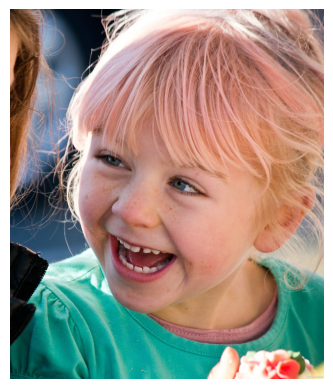

In [107]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis(False)